In [2]:
# Load required packages
library(alakazam)
library(dowser)
library(airr)
library(dplyr)

# read the database
db <- read_airr("/home/phil/processed_docker/r_docker/changeo_10x/r_filtered_contig_heavy_germ-pass.tsv")
glimpse(db)

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 


Attaching package: ‘dowser’


The following objects are masked from ‘package:alakazam’:

    ExampleDb, ExampleTrees



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 885
Columns: 62
$ sequence_id               <chr> "GTCTCGTTCGTAGGTT-1_contig_1", "ATAGACCGTGT…
$ sequence                  <chr> "GAGCATAAGATCACTGTTCTCTCTACAGTTACTAAGCACACA…
$ rev_comp                  <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ productive                <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, T…
$ v_call                    <chr> "IGHV1-53*01", "IGHV1-53*01", "IGHV2-2*01",…
$ d_call                    <chr> "IGHD2-4*01,IGHD2-9*02", "IGHD1-1*01", NA, …
$ j_call                    <chr> "IGHJ2*01", "IGHJ2*01", "IGHJ4*01", "IGHJ4*…
$ sequence_alignment        <chr> "CAGGTCCAACTGCAGCAGCCTGGGACT...GAACTGGTGAAG…
$ germline_alignment        <chr> "CAGGTCCAACTGCAGCAGCCTGGGACT...GAACTGGTGAAG…
$ junction                  <chr> "TGTGCAAGATCGAATGATTACGACGGGGAGGGTTTTGACTAC…
$ junction_aa               <chr> "CARSNDYDGEGFDYW", "CARPPYYGSSYVGYW", "CARH…
$ v_cigar                   <chr> "109S294=", "109S294=", "109S291=", "110S29…
$ d_cigar                   <c

In [3]:
clones <- formatClones(
db,
seq = "sequence_alignment",
clone = "clone_id",
subclone = "subclone_id",
nproc = 16,
chain = "H",
heavy = "IGH",
trait = "c_call",
cell = "cell_id",
locus = "locus",
minseq = 2,
split_light = FALSE,
majoronly = FALSE,
columns = NULL,
)

print(clones)

# A tibble: 10 x 4
   clone_id data       locus  seqs
   <chr>    <list>     <chr> <int>
 1 263_112  <airrClon> IGH       4
 2 396_280  <airrClon> IGH       3
 3 251_31   <airrClon> IGH       2
 4 255_469  <airrClon> IGH       2
 5 273_16   <airrClon> IGH       2
 6 446_243  <airrClon> IGH       2
 7 488_194  <airrClon> IGH       2
 8 695_370  <airrClon> IGH       2
 9 700_138  <airrClon> IGH       2
10 714_564  <airrClon> IGH       2


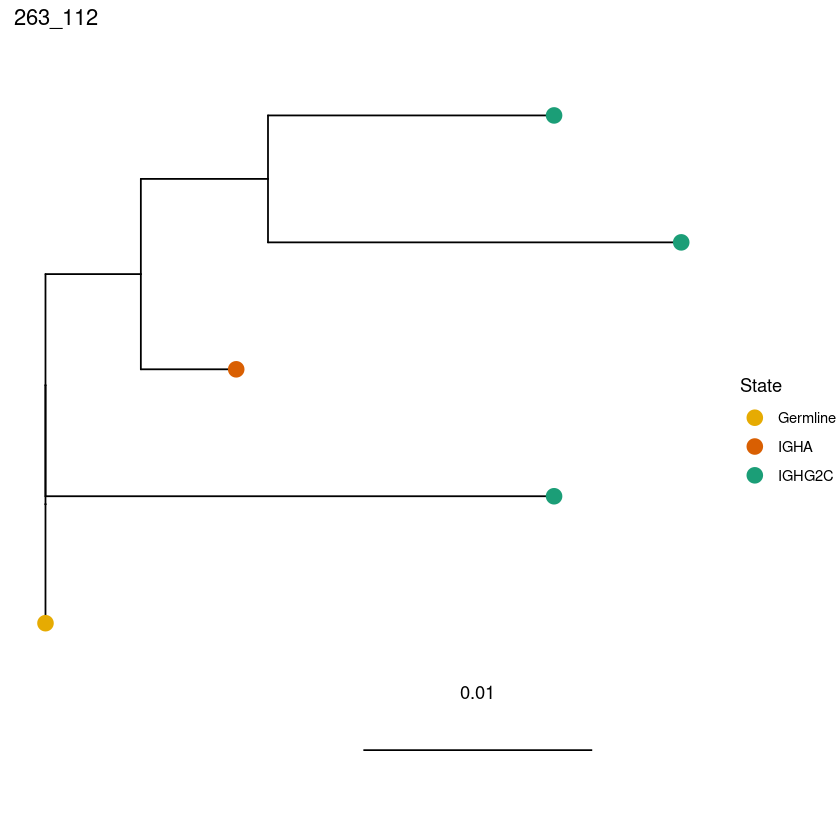

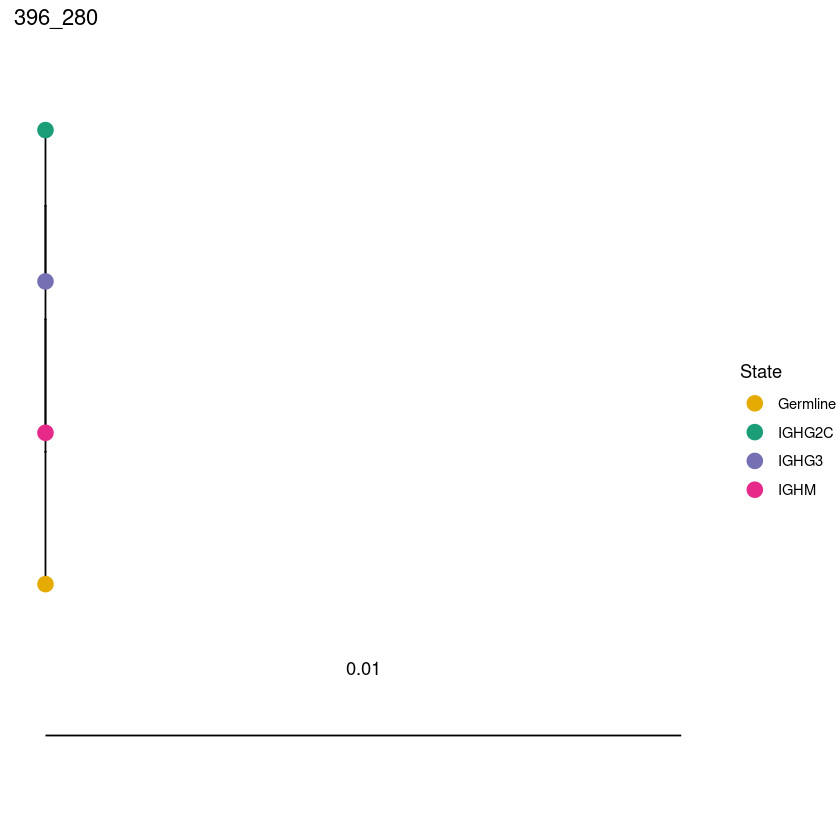

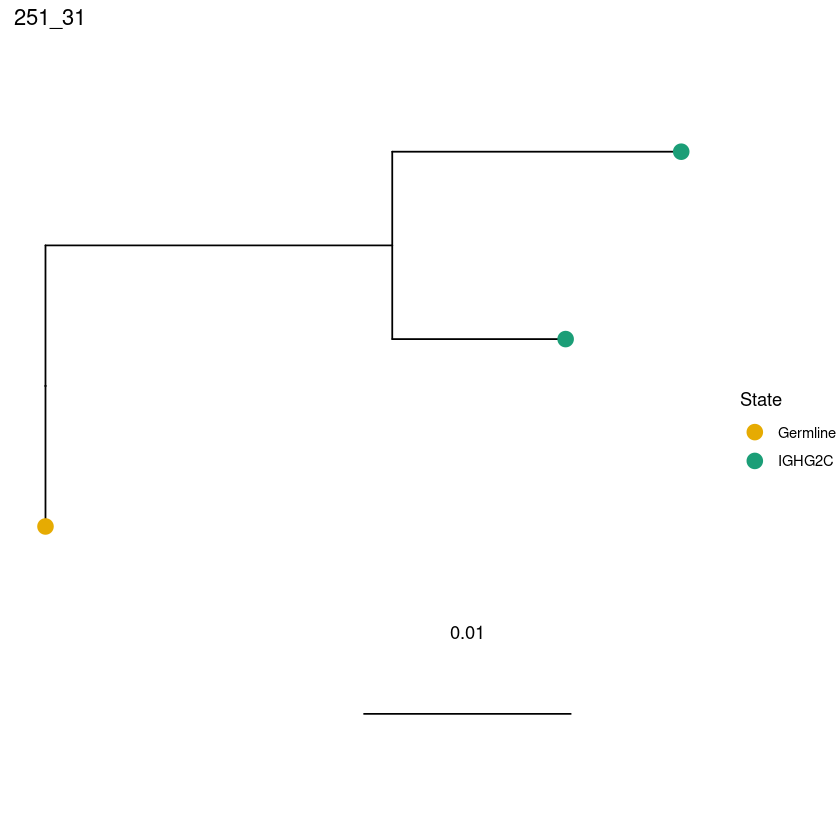

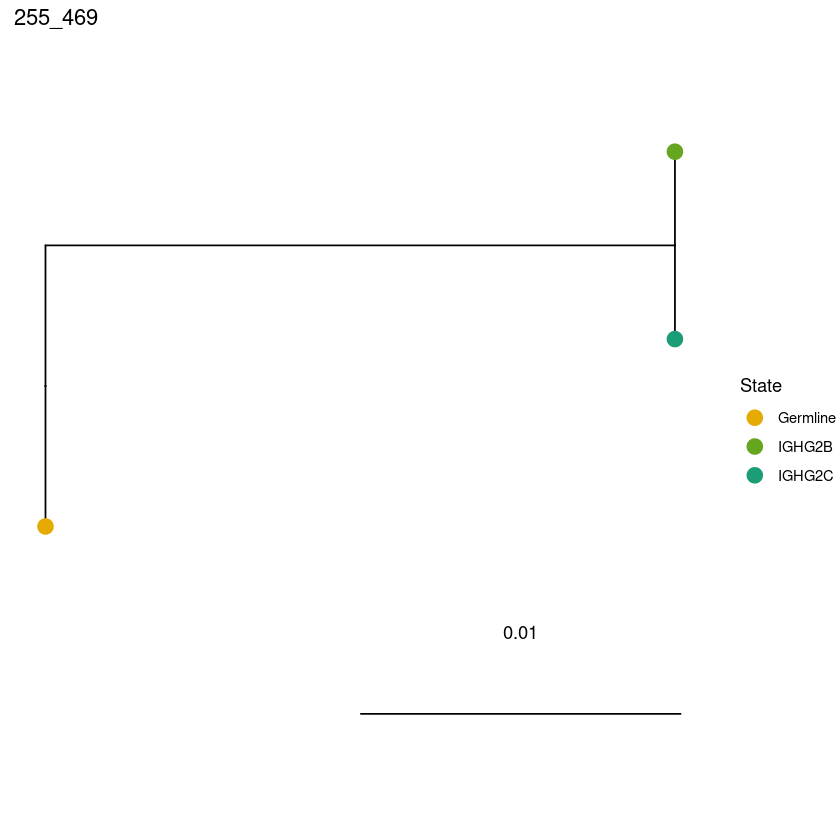

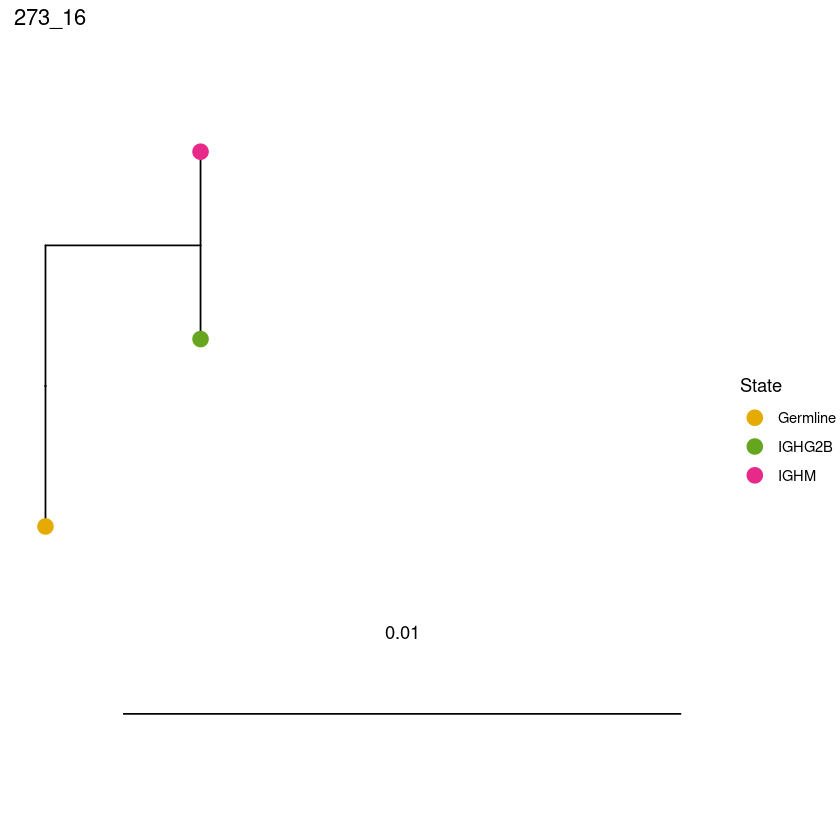

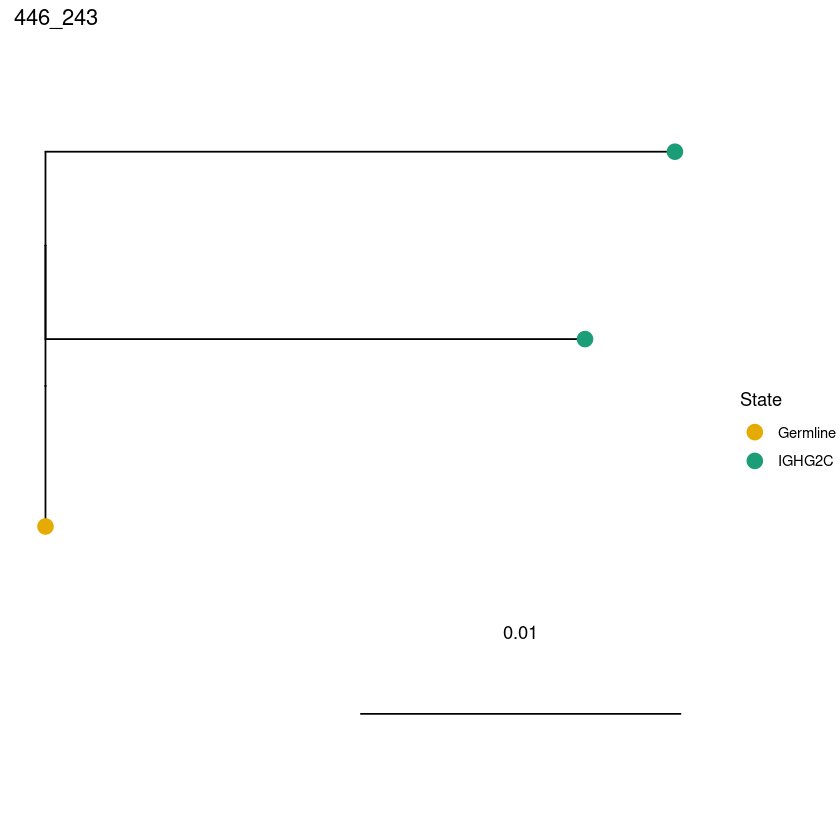

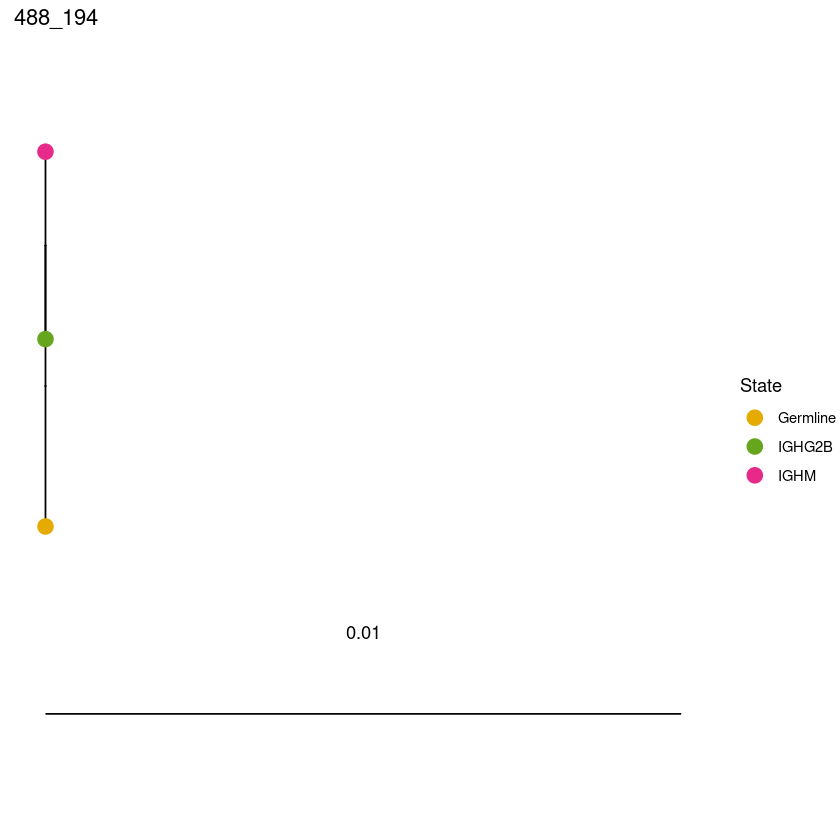

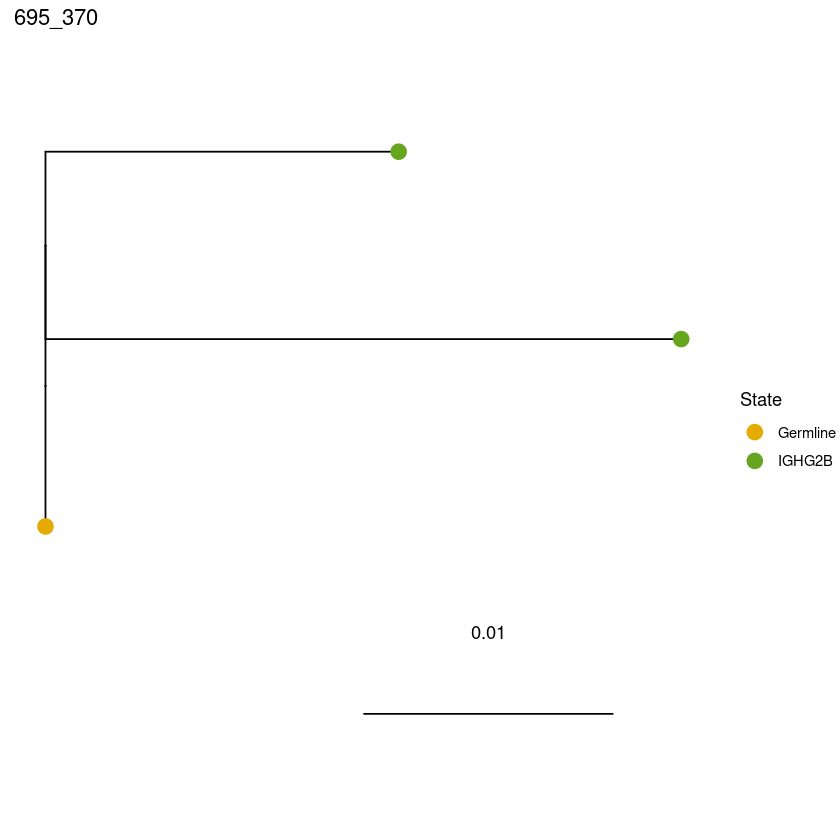

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]


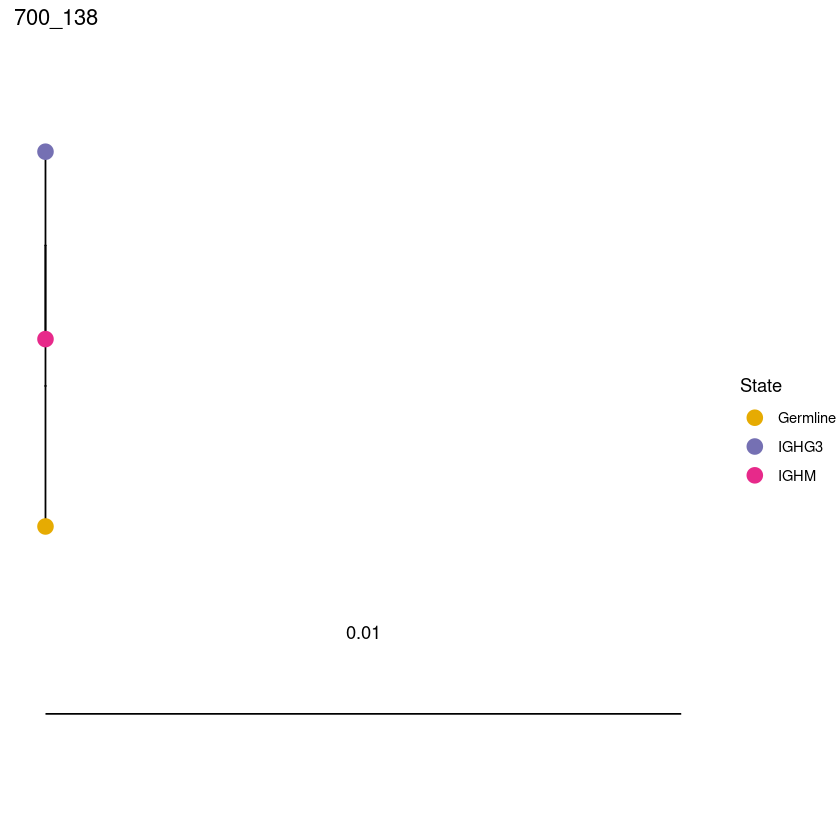

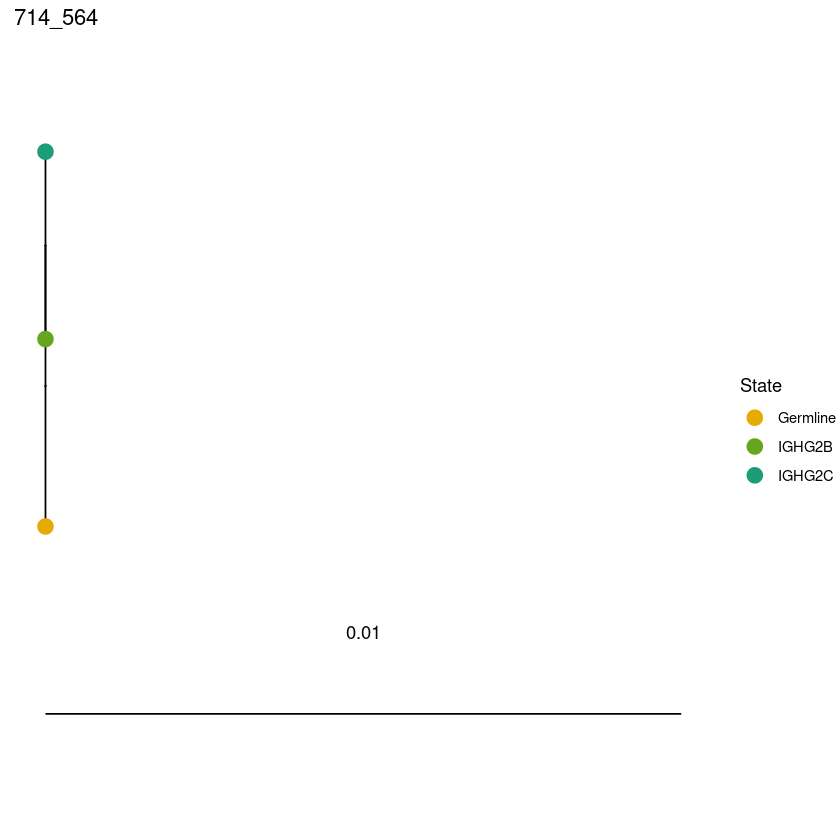

In [4]:
# Build maxmimum parsimony trees for first four clones using 
# phangorn package in R
trees <- getTrees(clones)

# simple tree plotting with ggtree R package with isotypes at tips
plotTrees(trees, nodes = FALSE, tips="c_call", tipsize = 4, node_palette = "Dark2", title = TRUE)

In [6]:
# simple tree plotting with ggtree R package with isotypes at tips
scaleBranches(trees, edge_type = "mutations")

clone_id data                                                    locus seqs
1  263_112  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   4   
2  396_280  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   3   
3  251_31   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
4  255_469  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
5  273_16   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
6  446_243  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
7  488_194  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
8  695_370  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
9  700_138  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
10 714_564  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
   trees                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

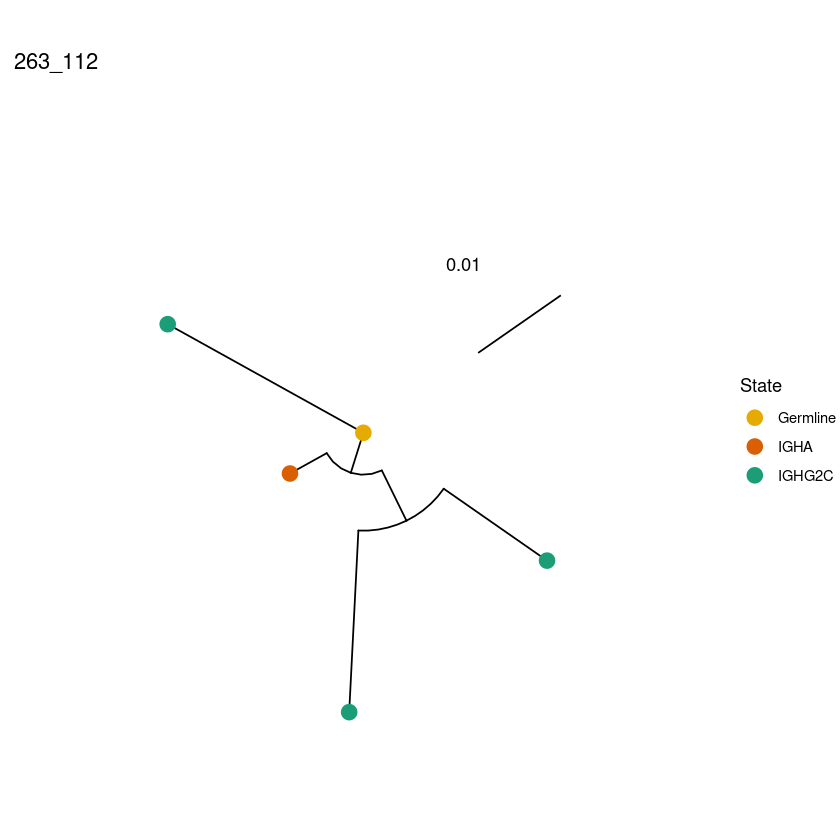

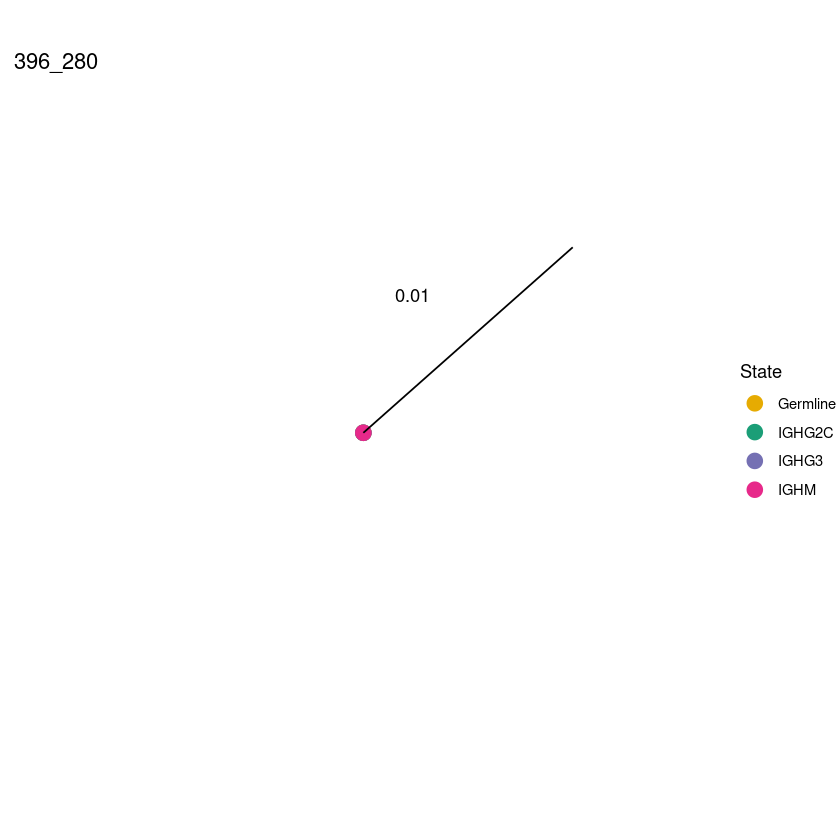

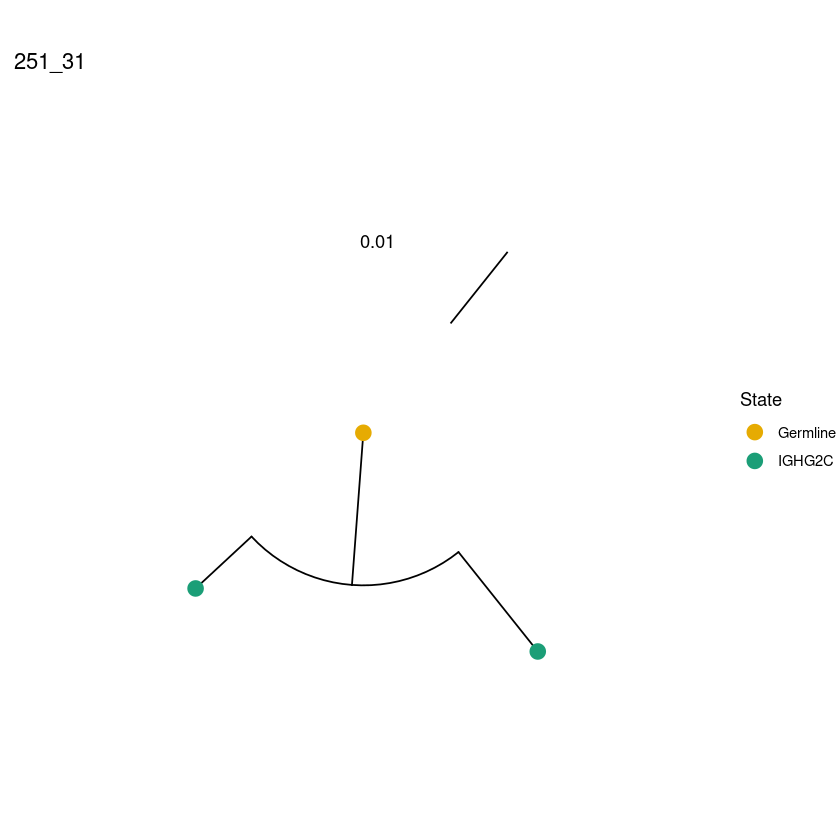

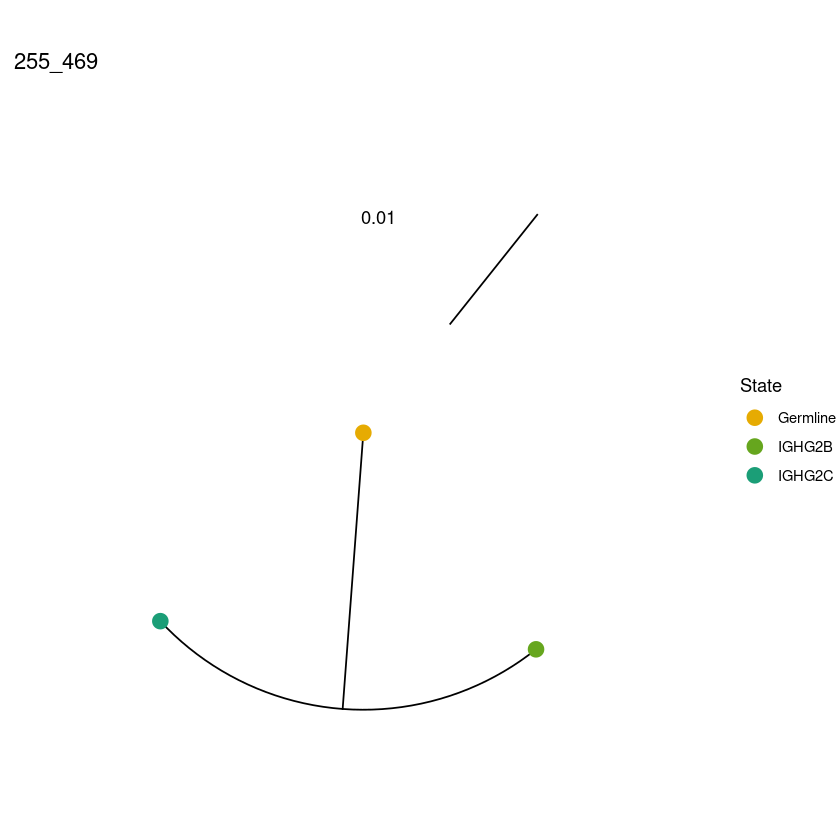

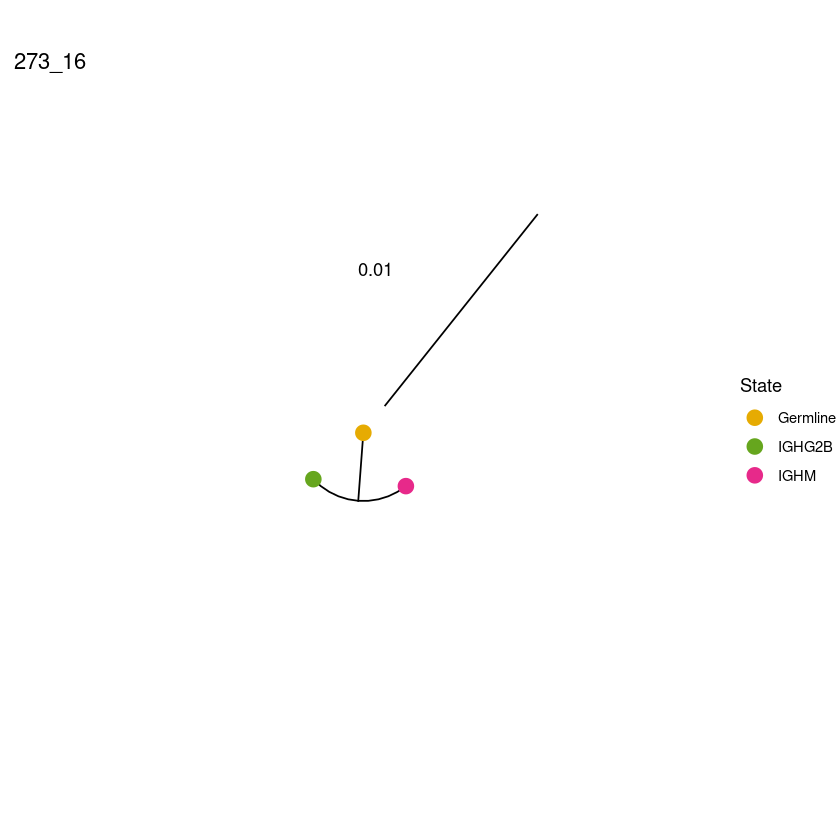

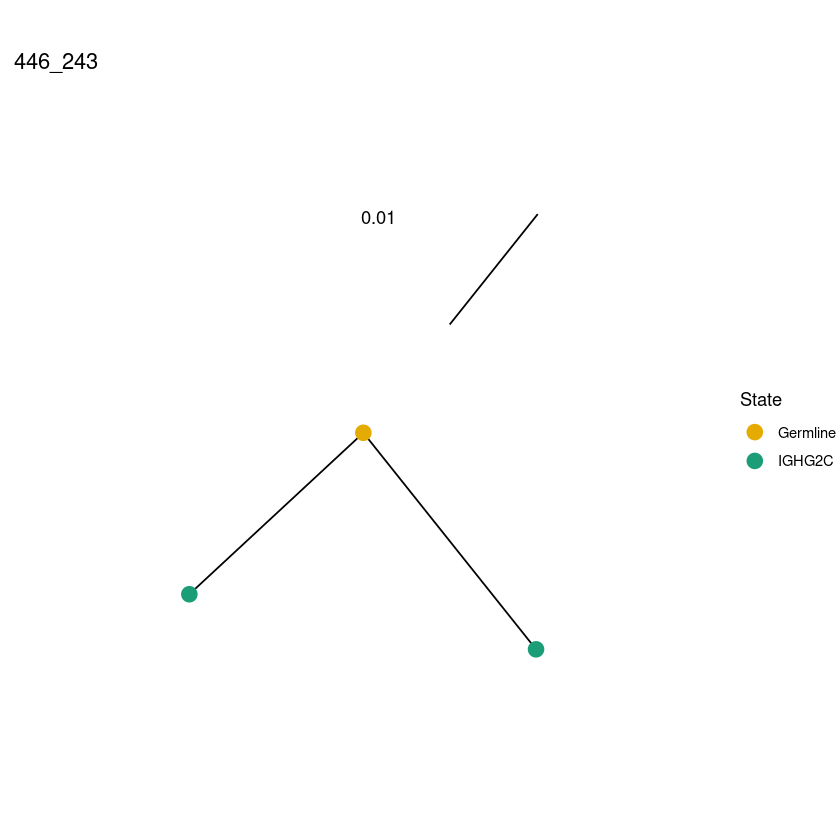

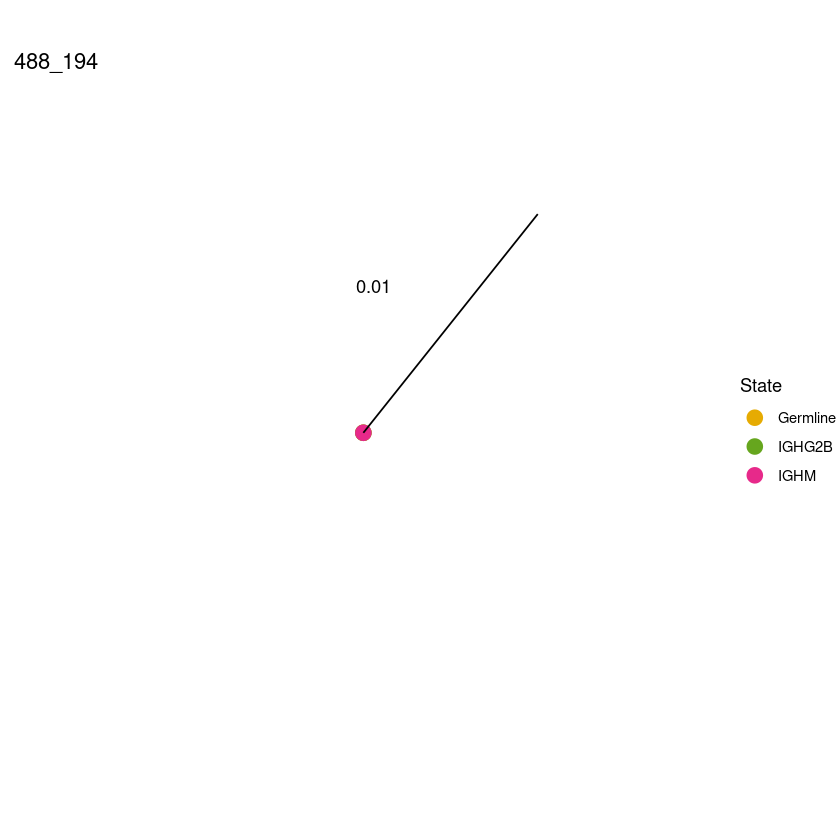

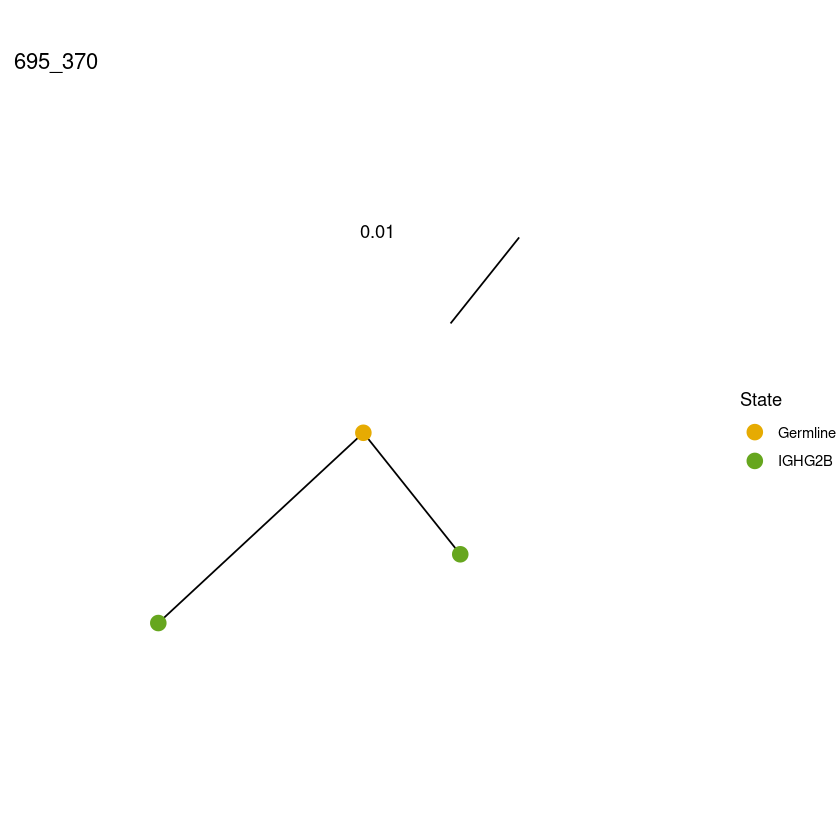

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]


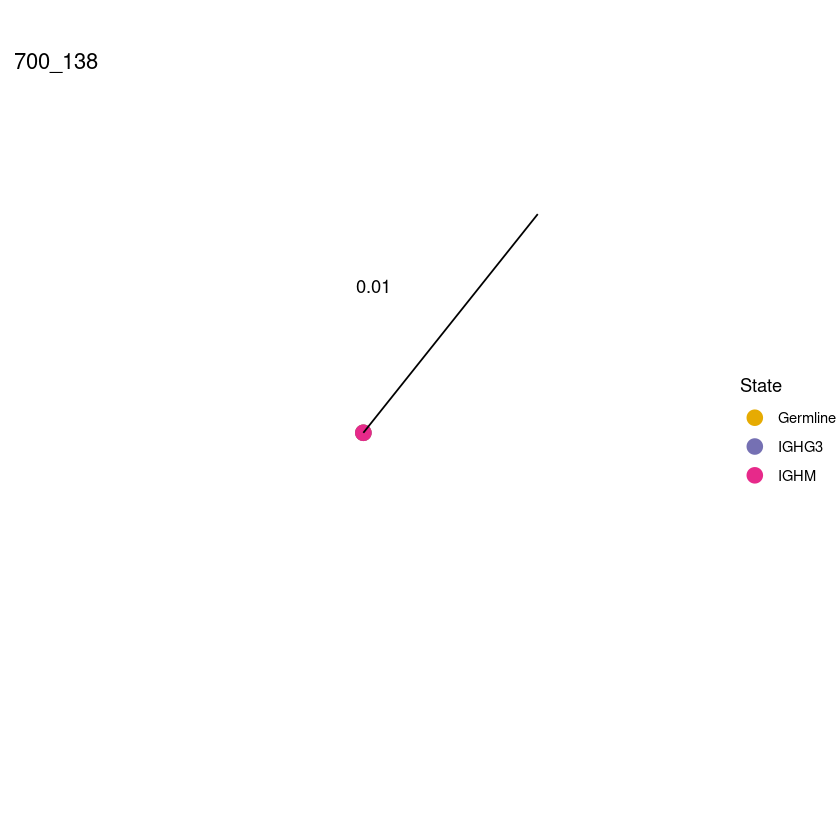

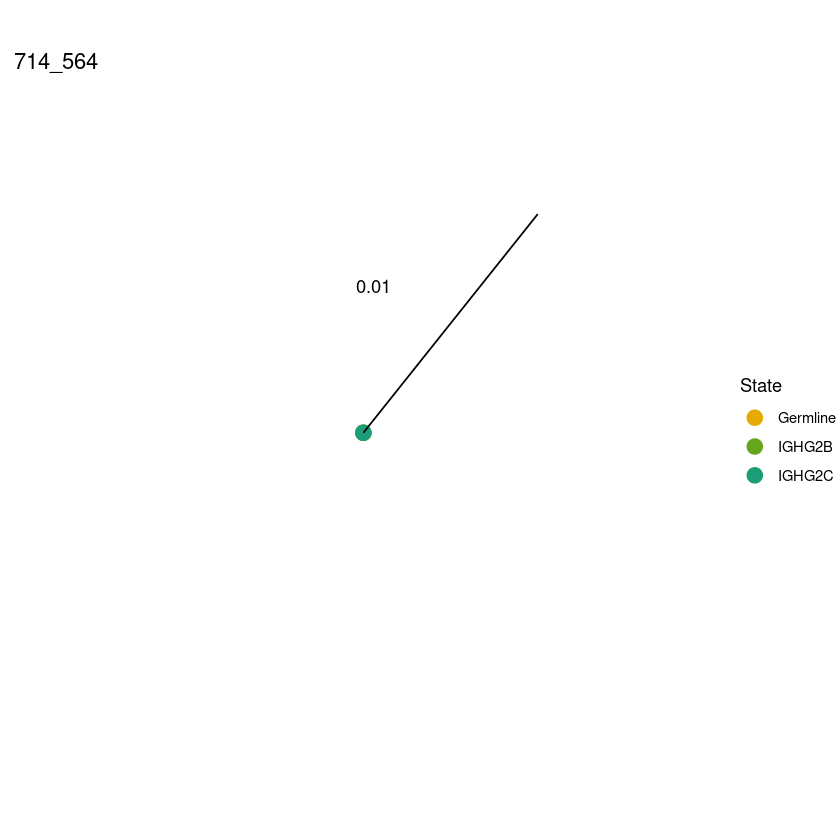

In [7]:
# simple tree plotting with ggtree R package with isotypes at tips
plotTrees(trees, nodes = FALSE, tips="c_call", tipsize = 4, node_palette = "Dark2", title = TRUE, layout = "circular")